# Shor's factorization algorithm

Shor's algorithm ([P.W. Shor, 1994](https://doi.org/10.1109%2Fsfcs.1994.365700)) allows for integer factorization in polynomial time ($\mathcal{O}(n^3\log n)$), unlike classical algorithms that require exponential time.

The algorithm is based on solving another problem, that of finding the period of the following function:

$$
f_{a,N}(x) = a^x \bmod N
$$

where $a$ and $N$ are positive integers, $a < N$ and co-prime (without common factors).

The period of $f_{a,N}$ is the smallest integer $r>0$ for which it verifies that $f_{a,N}(r) = 1$.

For example, suppose $a=7$ and $N = 15$. The following code shows the values of the function.


In [1]:
import numpy as np
N = 15
a = 7

xvals = np.arange(N)
yvals = [np.mod(a**x, N) for x in xvals]

print(yvals)

[1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4]


The period is $r=4$.

And, it can represented graphically:

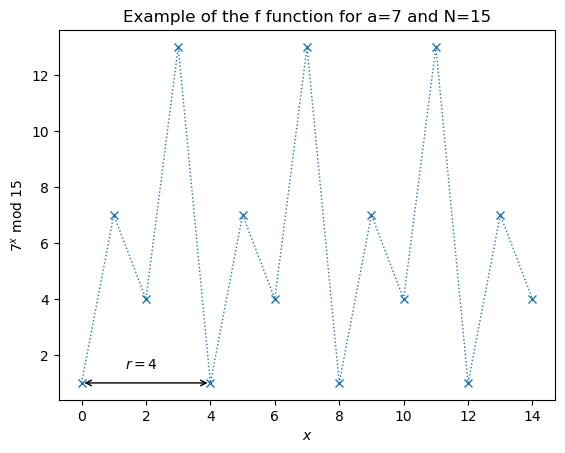

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel='$%i^x$ mod $%i$' % (a, N),
       title="Example of the f function for a={0} and N={1}".format(a,N))
try: # Plot r on the figure
    r = yvals[1:].index(1) +1 # Index of the first 1 in yvals (without considering yvals[0])
    plt.annotate('', xy=(0,1), xytext=(r,1), arrowprops=dict(arrowstyle='<->'))
    plt.annotate('$r=%i$' % r, xy=(r/3,1.5))
except ValueError:
    print('Period cannot be found. Check that a < N and that it does not have common factors.')

## Shor's Algorithm

The Shor algorithm uses quantum phase estimation (QPE) on the unitary operator:

$$U|y\rangle = |ay \bmod N\rangle$$

By performing successive applications of $U$ on $|1\rangle$, we will obtain states that correspond to the values of $f_{a,N}$.

For example, with $a=7$ and $N = 15$:

$$\begin{aligned}
U^0|1\rangle &= |1\rangle \\
U^1|1\rangle &= |7 \bmod 15\rangle = |7\rangle \\
U^2|1\rangle &= UU|1\rangle = U|7\rangle = |49 \bmod 15\rangle = |4\rangle \\
U^3|1\rangle &= UU^2|1\rangle = U|4\rangle = |28 \bmod 15\rangle = |13\rangle\\
U^4|1\rangle &= UU^3|1\rangle = U|13\rangle = |91 \bmod 15\rangle = |1\rangle\\
U^5|1\rangle &= UU^4|1\rangle = U|1\rangle = |7\rangle
\end{aligned}$$

It can be shown that:

$$U^s|1\rangle = |a^s \bmod N\rangle$$


Let $|u_0\rangle$ the addition of the states in a period: 

$$|u_0\rangle = \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{|a^k \bmod N\rangle} $$

It can checked that $|u_0\rangle$ is an eigenstate of $U$, with eigenvalue 1. For instance, with $a=7$ and $N = 15$:

$$\begin{aligned}
|u_0\rangle &= \tfrac{1}{\sqrt{4}}(|1\rangle + |7\rangle + |4\rangle + |13\rangle) \\[10pt]
U|u_0\rangle &= \tfrac{1}{\sqrt{4}}(U|1\rangle + U|7\rangle + U|4\rangle + U|13\rangle) \\[10pt]
 &= \tfrac{1}{\sqrt{4}}(|7\rangle + |4\rangle + |13\rangle + |1\rangle) \\[10pt]
 &= |u_0\rangle
\end{aligned}$$



## Shor's Algorithm

### Another Eigenstate of U

Another eigenstate of U is:

$$
|u_1\rangle = \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i k}{r}}|a^k \bmod N\rangle}
$$

In this case, the associated eigenvalue is $e^{\tfrac{2\pi i}{r}}$:

$$
U|u_1\rangle = e^{\tfrac{2\pi i}{r}}|u_1\rangle
$$


### Example with a=7 and N=15

Consider the case where $a=7$ and $N=15$, which implies $r=4$. In this scenario, the state $|u_1\rangle$ can be expressed as:

$$
|u_1\rangle = \frac{1}{\sqrt{4}}\left(|1\rangle + e^{-\frac{2\pi i}{4}}|7\rangle + e^{-\frac{2\pi i}{2}}|4\rangle + e^{-\frac{2\pi i}{3}}|13\rangle\right)
$$

Applying the operator $U$ to this state yields:

$$
U|u_1\rangle = \frac{1}{\sqrt{4}}\left(U|1\rangle + e^{-\frac{2\pi i}{4}}U|7\rangle + e^{-\frac{2\pi i}{2}}U|4\rangle + e^{-\frac{2\pi i}{3}}U|13\rangle\right)
$$

Since $U$ maps $|a^k \bmod N\rangle$ to $|a^{k+1} \bmod N\rangle$, we have:

$$
U|u_1\rangle = \frac{1}{\sqrt{4}}\left(|7\rangle + e^{-\frac{2\pi i}{4}}|4\rangle + e^{-\frac{2\pi i}{2}}|13\rangle + e^{-\frac{2\pi i}{3}}|1\rangle\right)
$$

Further simplification leads to:

$$
U|u_1\rangle = \frac{1}{\sqrt{4}}e^{\frac{2\pi i}{4}}\left(e^{-\frac{2\pi i}{4}}|7\rangle + e^{-\frac{2\pi i}{2}}|4\rangle + e^{-\frac{2\pi i}{3}}|13\rangle + e^{-\frac{2\pi i}{4}}|1\rangle\right)
$$

Finally, we can see that the action of $U$ on $|u_1\rangle$ results in a phase shift of $e^{\frac{2\pi i}{4}}$, confirming that $|u_1\rangle$ is indeed an eigenstate of $U$ with the corresponding eigenvalue $e^{\frac{2\pi i}{4}}$.


In general, the eigenstates of \(U\) will have the following form:

$$
|u_s\rangle = \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i s k}{r}}|a^k \bmod N\rangle}
$$

with \(s\) being an integer and \(0\leq s < r\). The associated eigenvalue is \(e^{\tfrac{2\pi i s}{r}}\):

$$U|u_s\rangle = e^{\tfrac{2\pi i s}{r}}|u_s\rangle 
$$


It can be probed that the following verifies:

$$ \tfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |u_s\rangle = |1\rangle$$

For example, with $a=7$ y $N = 15$ ($r=4$):

$$\begin{aligned}
|u_0\rangle &= \tfrac{1}{2}(|1\rangle \hphantom{e^{-\tfrac{2\pi i}{12}}}+ |7\rangle \hphantom{e^{-\tfrac{12\pi i}{12}}} + |4\rangle \hphantom{e^{-\tfrac{12\pi i}{12}}} + |13\rangle) \\[10pt]
|u_1\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{2\pi i}{4}}|7\rangle + e^{-\tfrac{\hphantom{1}4\pi i}{4}}|4\rangle + e^{-\tfrac{\hphantom{1}6\pi i}{4}}|13\rangle) \\[10pt]
|u_2\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{4\pi i}{4}}|7\rangle + e^{-\tfrac{\hphantom{1}8\pi i}{4}}|4\rangle + e^{-\tfrac{12\pi i}{4}}|13\rangle)\\[10pt]
|u_3\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{6\pi i}{4}}|7\rangle + e^{-\tfrac{12\pi i}{4}}|4\rangle + e^{-\tfrac{18\pi i}{4}}|13\rangle) 
\end{aligned}$$

Thus, the addition is:

$$
\tfrac{1}{\sqrt{4}}\sum_{s=0}^{3} |u_s\rangle = \tfrac{1}{2}(|u_0\rangle + |u_1\rangle + |u_1\rangle + |u_3\rangle) = \\
\frac{1}{2}\left(4|1\rangle + (1+e^{-\tfrac{2\pi i}{4}}+e^{-\tfrac{4\pi i}{4}}+e^{-\tfrac{6\pi i}{4}})|7\rangle +\\
(1+e^{-\tfrac{\hphantom{1}4\pi i}{4}}+e^{-\tfrac{\hphantom{1}8\pi i}{4}}|4\rangle+e^{-\tfrac{12\pi i}{4}})|4\rangle \\
+ (1+e^{-\tfrac{\hphantom{1}6\pi i}{4}}+e^{-\tfrac{12\pi i}{4}}+e^{-\tfrac{18\pi i}{4}})|13\rangle
\right)
$$

And since:

$$
\begin{aligned}
e^{-\tfrac{2\pi i}{4}} &= e^{-\tfrac{\pi i}{2}} = -i\\
e^{-\tfrac{4\pi i}{4}} &= e^{-{\pi i}} = -1\\
e^{-\tfrac{6\pi i}{4}} &= e^{-\tfrac{3\pi i}{2}} = +i\\
e^{-\tfrac{8\pi i}{4}} &= e^{-{2\pi i}} = e^{0} = +1\\
e^{-\tfrac{12\pi i}{4}} &= e^{-{3\pi i}} = e^{-{\pi i}} = -1\\
e^{-\tfrac{18\pi i}{4}} &= e^{-\tfrac{9\pi i}{2}} = e^{-\tfrac{\pi i}{2}} = -i
\end{aligned}
$$

the result is:

$$
\tfrac{1}{\sqrt{4}}\sum_{s=0}^{3} |u_s\rangle = 2|1\rangle = |1\rangle
$$

Thus, we apply $U$ to the state $|1\rangle$ we can write:

$$
U|1\rangle = \tfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1} U|u_s\rangle = \tfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1} e^{\tfrac{2\pi i s}{r}}|u_s\rangle = \tfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1} e^{2\pi i \theta}|u_s\rangle
$$

with $\theta = s/r$.

Therefore, if we apply QPE to $U$ using $|1\rangle$ as the eigenstate, the output will return a phase $\theta = s/r$, where $s$ is an integer with $0\leq s < r$. 

From $r$, it is simple to obtain the factors of $N$. As we know that $r = s/\theta$, by testing different values of $s$, we search for the factors of $N$.


The scheme of a circuit that implements this algorithm (with the order of qubits used in qiskit) is:

<img src="images/shor_circuit_1.png">

The bottleneck of Shor's algorithm lies in the creation of the $U^{2^j}$ gates. There are different alternatives. A simple example is described in [S. Beauregard, 2003](https://arxiv.org/abs/quant-ph/0205095). A recent implementation for IBM systems is in [U. Skosana & M. Tame, 2021](https://doi.org/10.1038/s41598-021-95973-w). In [C. Gidney & M. Ekerå (2021)](https://doi.org/10.22331/q-2021-04-15-433), it is shown that with 20 million noisy qubits, the RSA algorithm of 2048 bits can be broken in just 8 hours.


## Implementation

The **Qiskit** implementation of the Shor's Algorithm is documented in the [Qiskit textbook](https://learn.qiskit.org/course/ch-algorithms/shors-algorithm).

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


Let us start solving the problem of period finding. For this, let us visualize it with matplotlib and numpy

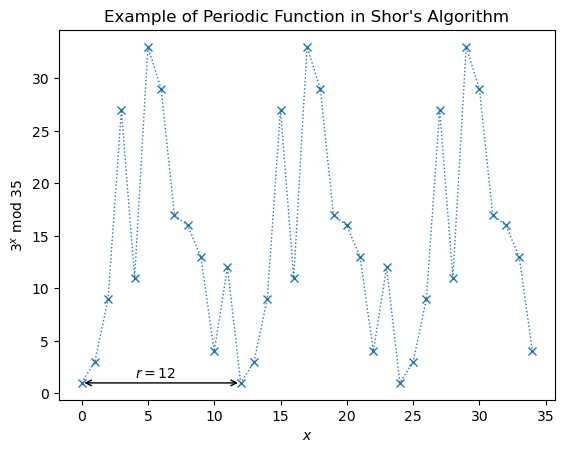

In [4]:
N = 35
a = 3

# Calculate the plotting data
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

The solution is to use QPE algorithm on the U operator

$$ U |y\rangle = |ay \mod N\rangle $$

Let us visualize the effect of the repeated application of $U$

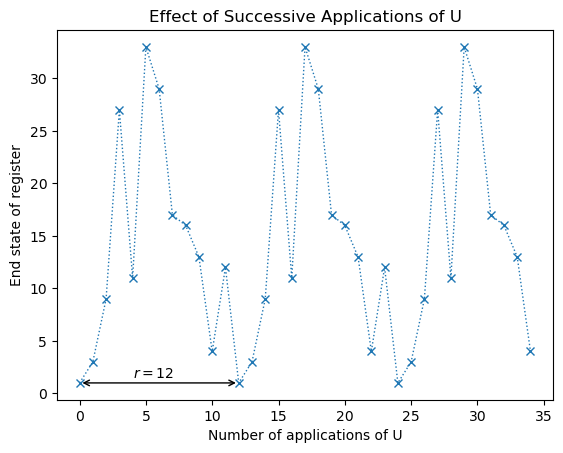

In [5]:
ax.set(xlabel='Number of applications of U',
       ylabel='End state of register',
       title="Effect of Successive Applications of U")
fig

In this example we will solve the period finding problem for $a=7$ and $N=15$. We provide the circuits for where:

$$U |y\rangle=|ay \mod 15\rangle$$

Every $U^x$ is created by repeating the $U$ circuit $x$ times

In [6]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

We use 8 counting qubits

In [7]:
# Specify variables
N_COUNT = 8  # number of counting qubits
a = 7

Another building block is the circuit for the $QFT\dagger$

In [8]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

Using these components, the circuit of the Shor's algorithm is.

In [9]:
# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(N_COUNT), range(N_COUNT))

# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw(fold=-1)  # -1 means 'do not fold'

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

Now, let us check the ouput of the *qc* circuit

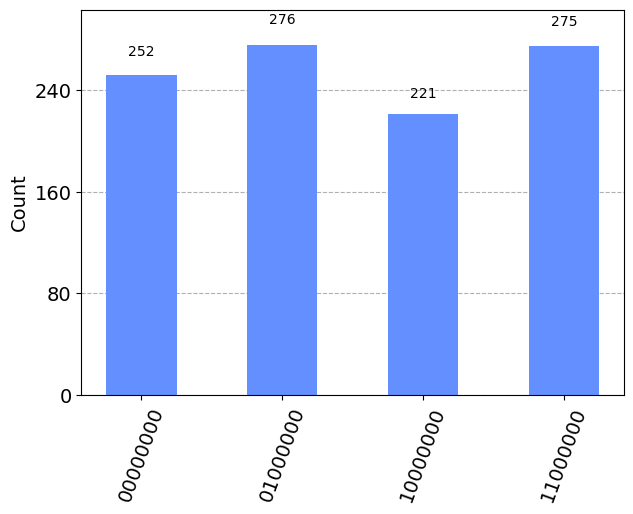

In [10]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()
plot_histogram(counts)

Since we have 8 qubits, these results correspond to measured phases of:

In [11]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  11000000(bin) = 192(dec)  192/256 = 0.75
1  10000000(bin) = 128(dec)  128/256 = 0.50
2  00000000(bin) =   0(dec)    0/256 = 0.00
3  01000000(bin) =  64(dec)   64/256 = 0.25


We can now use the continued fractions algorithm to attempt to find $s$ and $r$. 
Python has this functionality built in: We can use the *fractions* module to turn 
a *float* into a *Fraction* object, for example:

In [12]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

Because this gives fractions that return the result exactly (in this case, $0.6660000...$), 
this can give gnarly results like the one above. We can use the .limit_denominator() method 
to get the fraction that most closely resembles our float, with denominator below a certain value:

In [13]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

Much nicer! The order ($r$) must be less than $N$, so we will set the maximum denominator to be $15$:

In [14]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.50      1/2            2
2   0.00      0/1            1
3   0.25      1/4            4


We can see that two of the measured eigenvalues provided us with the correct result: $r=4$, and we can see 
    that Shor’s algorithm has a chance of failing. These bad results are because $s=0$, or because $s$ and $r$ 
    are not coprime and instead of $r$ we are given a factor of $r$. 
    The easiest solution to this is to simply repeat the experiment until we get a satisfying result for $r$.

## Modular exponentiation

The method used in the previous solution to create $U^x$ of creating $U_{2j}$ gate by repeated $U$ grows exponentially with $j$, thus, this is not a polynomial algorithm. This can be done in classical computing with a method called repeated squaring to calculate an exponential of the form $2^j$. In plain numpy, this is implemented as follows:

In [15]:
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    for _ in range(j):
        a = np.mod(a**2, N)
    return a

a2jmodN(7, 2049, 53)

47

If an efficient algorithm is possible in Python, then we can use the same algorithm on a quantum computer. Unfortunately, despite scaling polynomially with $j$, modular exponentiation circuits are not straightforward and are the bottleneck in Shor’s algorithm. A beginner-friendly implementation can be found in [this reference](https://arxiv.org/abs/quant-ph/0205095).

## Factoring from period finding

Not all factoring problems are difficult; we can spot an even number instantly and know that one of its factors is 2. In fact, there are specific criteria for choosing numbers that are difficult to factor, but the basic idea is to choose the product of two large prime numbers.

A general factoring algorithm will first check to see if there is a shortcut to factoring the integer (is the number even? Is the number of the form $N=a^b$?), before using Shor’s period finding for the worst-case scenario. Since we aim to focus on the quantum part of the algorithm, we will jump straight to the case in which $N$ is the product of two primes.

### Example: Factoring 15

To see an example of factoring on a small number of qubits, we will factor 15, which we all know is the product of the not-so-large prime numbers 3 and 5

In [16]:
N=15

The first step is to choose a random number, $a$, between $1$ and $N-1$:

In [17]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, 15)
print(a)

7


Next we quickly check it isn't already a non-trivial factor of $N$:

In [18]:
from math import gcd # greatest common divisor
gcd(a, N)

1

Great. Next, we do Shor's order finding algorithm for $a = 7$ and $N = 15$. 
Remember that the phase we measure will be  $s/r$ where:

 $$a^r \mod N = 1$$

and $s$ is a random integer between 0 and $N-1$.

In [19]:
def qpe_amod15(a):
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 8
    qc = QuantumCircuit(4+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q),
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # `memory=True` tells the backend to save each measurement in a list
    job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

From this phase, we can easily find a guess for :

In [20]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15)

Register Reading: 01000000
Corresponding Phase: 0.25


Fraction(1, 4)

In [21]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


Now we have $r$, we might be able to use this to find a factor of $N$. Since:

$$a^r \mod N = 1$$

then:

$$(a^r - 1) \mod N = 0$$

which means $N$ must divide $a^r - 1$. And if $r$ is also even, then we can write:

$$a^r - 1 = (a^{r/2} - 1)(a^{r/2} + 1)$$

(if $r$ is not even, we cannot go further and must try again with a different value for $a$). There is then a high probability that the greatest


In [22]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 5]


The cell below repeats the algorithm until at least one factor of 15 is found. You should try re-running the cell a few times to see how it behaves.

In [23]:
a = 7
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print("*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True


ATTEMPT 1:
Register Reading: 01000000
Corresponding Phase: 0.25
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: {guess} ***
*** Non-trivial factor found: {guess} ***
